# R 绘图基础

R 的绘图功能一直为业内所津津乐道。

p.s. *用了 Python 的 matplotlib 和 R 的 ggplot2 后，再也不想用 MATLAB 画图了……*

我现在这里先给出本博文用到的包：

In [1]:
library(Hmisc)

Loading required package: lattice
Loading required package: survival
Loading required package: Formula
Loading required package: ggplot2

Attaching package: 'Hmisc'

The following objects are masked from 'package:base':

    format.pval, round.POSIXt, trunc.POSIXt, units



In [2]:
library(vioplot)

Loading required package: sm
Package 'sm', version 2.2-5.4: type help(sm) for summary information


## 基础命令

使用 `dev.new()` 命令新建一个图片视图，这样你可以输出多个图片到屏幕，而不是让之后输出的覆盖之前的图形。关于 dev.next(), dev.prev(), dev.set() 及 dev.off() 等内容，参考 help(dev.cur). 

### plot() 绘图类型

基本的绘图类型有以下几种，使用 type= 参数指定：

- p：仅数据点，默认值。
- l：仅线段
- b：线段与点
- c：仅线段，但点的位置留出空白
- o：线段与点，但线段会延伸到点内部
- h：直方图风格，即带竖直密度线
- s：阶梯图
- S：其他特殊情况
- n；不绘制图形。用于指定标题、坐标轴名称的情况

### 输出到文件

将画图的内容输出到文件，可以指定路径，不指定就输出到当前工作目录。例如输出 pdf：

```r
pdf("plot.pdf")
  plot(c(1, 2, 3), c(3, 4, 2))
dev.off()
```

除了 pdf() 外，其他可用的输出格式对应函数：

- **wmf**：win.metafile()，仅在 Windows 系统下使用
- **png**: png()
- **jpeg**: jpeg()
- **bmp**: bmp()
- **tiff**: tiff()
- **ps**: postscript()

例子。详细的参数在下文讨论。

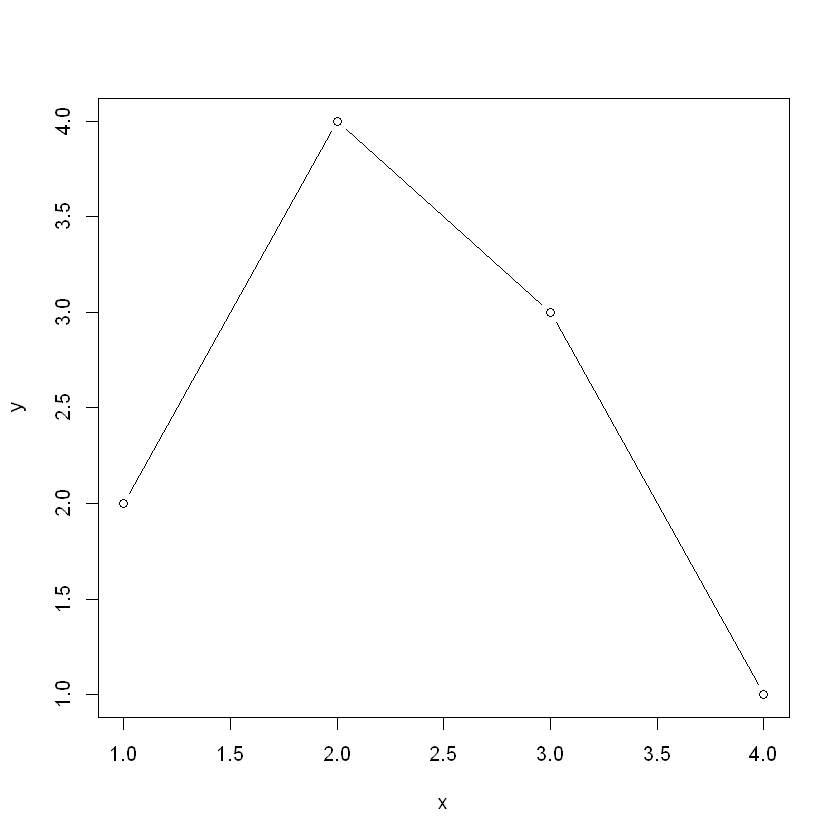

In [3]:
x <- 1:4
y <- c(2, 4, 3, 1)
plot(x, y, type="b")

## 绘图参数：par()

函数 par() 用来获取**当前图形**的参数。如果加入 no.readonly=TRUE, 表示该参数列表是非只读的，即用户可以进行修改。例如对于上图，我们获取其参数，进行更改后再传到新的图中（pch 参数可能有些费解，我们在下文讨论）：

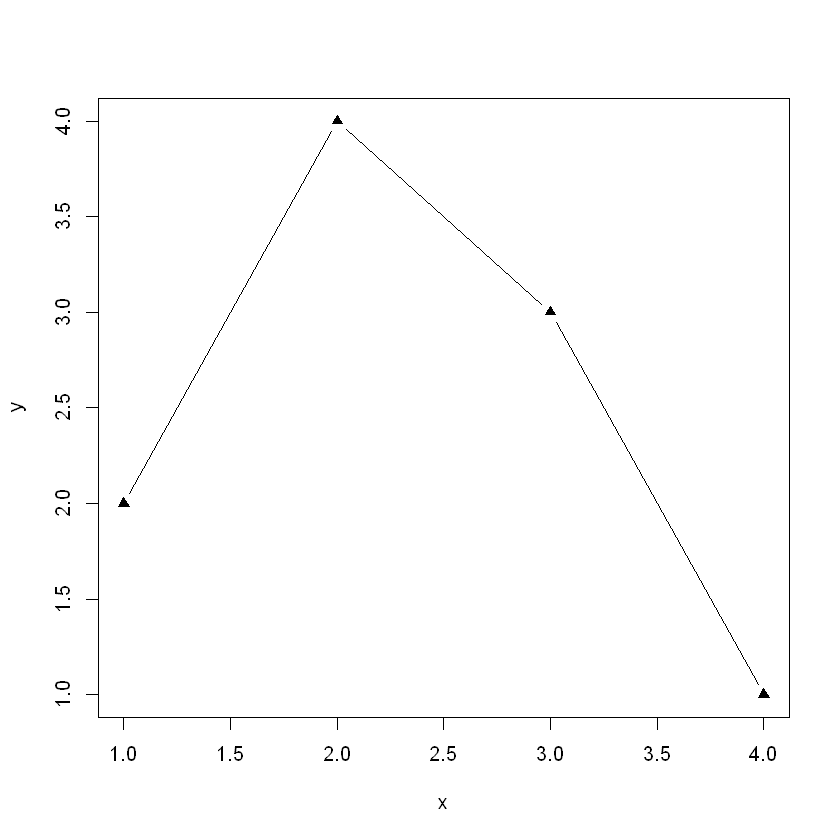

In [4]:
# 方法一：类交互式的更改方法
opar <- par(no.readonly=T)
par(pch=17)  # 更改点样式
plot(x, y, type="b")
par(opar)

# 方法二：部分绘图参数支持直接传入参数
# plot(x, y, type="b", pch=17)

### 点样式、线宽与线型

| 参数 | 可选值 |
| --- | --- |
| pch 点样式 | 0空方块，1空圆，2空三角，3加号，4乘号，5斜空方块，6空倒三角，7叉方块，8星号，9斜叉方块，10圈加号，11六芒星，12田，13圈乘号，14加框尖角，15方块，16圆点，17三角，18斜方块，19带边线圆点，20带边线2/3圆点，21填充圆，22填充方块，23填充斜方块，24填充三角，25填充倒三角。 |
| cex 点大小 | 数字，例如 0.5。 |
| lty 线型 | 1实线，2短虚线，3点线，4点划线，5长虚线，6长短划线。 |
| lwd 线宽 | 数字。 |

*注: pch = 19 相比 pch = 16，主要体现在 lwd 与 cex 不同时，带边线圆点的尺寸较大。*

### 颜色

调整颜色的参数有：

- col: 绘图颜色。
- col.axis：坐标轴刻度颜色。
- col.lab：坐标轴名称颜色。
- col.main：图形标题颜色。
- col.sub：副标题颜色。
- fg：图形前景色。
- bf：图形背景色。

指定颜色的方式有如下几种：

+ 数字下标：col=1
+ 名称：col="white"
+ 十六进制值：col="#FFFFFF"
+ 标准化RGB/HSV值：col=rgb(0,1,1)/hsv(0,0,1)

至于 R 支持的颜色名称，多达 600 余种，这里给出一些我认为常见的：

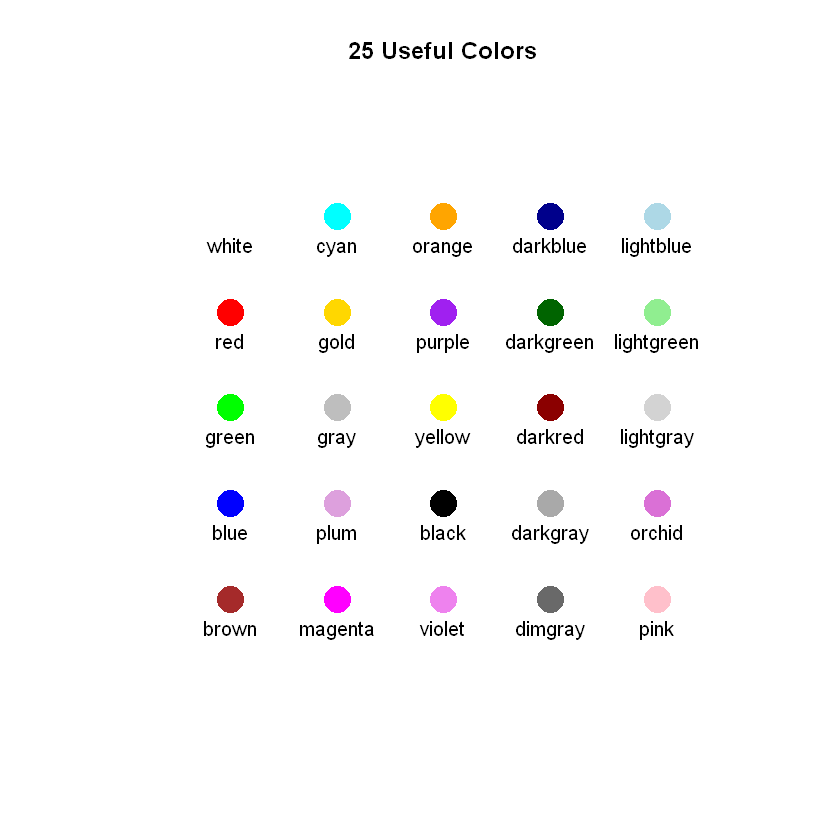

In [5]:
OutputColors <- function(color.names, titleStr="", showText=F) {
    plot(1,1, axes=F, xlim=c(0, 6), ylim=c(0, 6), main=titleStr, xlab="", ylab="")
    for (i in c(1:5)) {
        for (j in c(1:5)) {
            par(new=T)
            plot(i, 6-j, cex=3, xlim=c(0, 6), ylim=c(0, 6), axes=F,
                 main="", xlab="", ylab="", pch=19, 
                 col=color.names[(i-1)*5+j])
            if (showText) {
                text(i, 6-j-0.1, pos=1, color.names[(i-1)*5+j])
            }
        }
    }
}

colorLst <- c("white", "red", "green", "blue", "brown",
              "cyan", "gold", "gray", "plum", "magenta",
              "orange", "purple", "yellow", "black", "violet",
              "darkblue", "darkgreen", "darkred", "darkgray", "dimgray",
              "lightblue", "lightgreen", "lightgray", "orchid", "pink")
OutputColors(colorLst, "25 Useful Colors", T)

R 中还有其他方式可以生成一系列的颜色，比如：

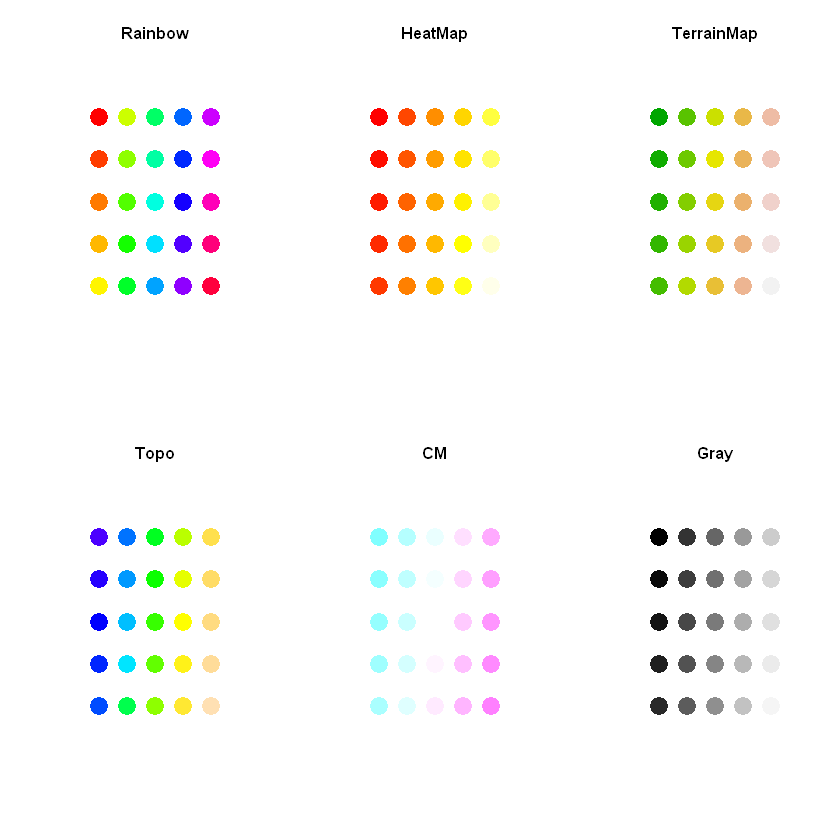

In [6]:
par(mfrow=c(2 ,3))
OutputColors(rainbow(25), "Rainbow")
OutputColors(heat.colors(25), "HeatMap")
OutputColors(terrain.colors(25), "TerrainMap")
OutputColors(topo.colors(25), "Topo")
OutputColors(cm.colors(25), "CM")
# 灰度：需要标准化
OutputColors(gray(1/25*c(0:25)), "Gray")

### 标签和标题文本

从上文可以看出端倪，标签与标题参数有：

- **标题/副标题**：title/sub
- **坐标轴标题**：xlab/ylab

在标题中使用上文介绍的参数：

```r
title(main="My Title", col.main="red",
    sub="My Subtitle", col.sub="blue",
    xlab="My X label", ylab="My Y label",
    col.lab="green", cex.lab=0.75)
```

要定义它们的字体，可添加的参数有：

| 参数 | 含义 |
| --- | --- |
| cex | 基础缩放倍数 |
| cex.axis | 坐标轴刻度的缩放倍数 |
| cex.lab | 坐标轴标题的缩放倍数 |
| cex.main | 图形标题的缩放倍数 |
| cex.sub | 图形副标题的缩放倍数 |
| font | 字体样式。1常规，2加粗，3加斜，4加粗加斜，5符号字体 |
| font.axis | 坐标轴刻度的字体样式 |
| font.lab/ main/ sub | 类推 |
| ps | 字体磅值。文字的最终大小为 cex * ps |
| family | 字族。例如 serif衬线, sans无衬线, mono等宽 |

字族的使用需要注意：Windows 中，等宽映射为 Courier New，衬线 Times New Roman，无衬线 Arial。你可以使用 windowsFonts() 函数来更改或者创建映射，例如我个人常用的 DejaVu 等宽字体：

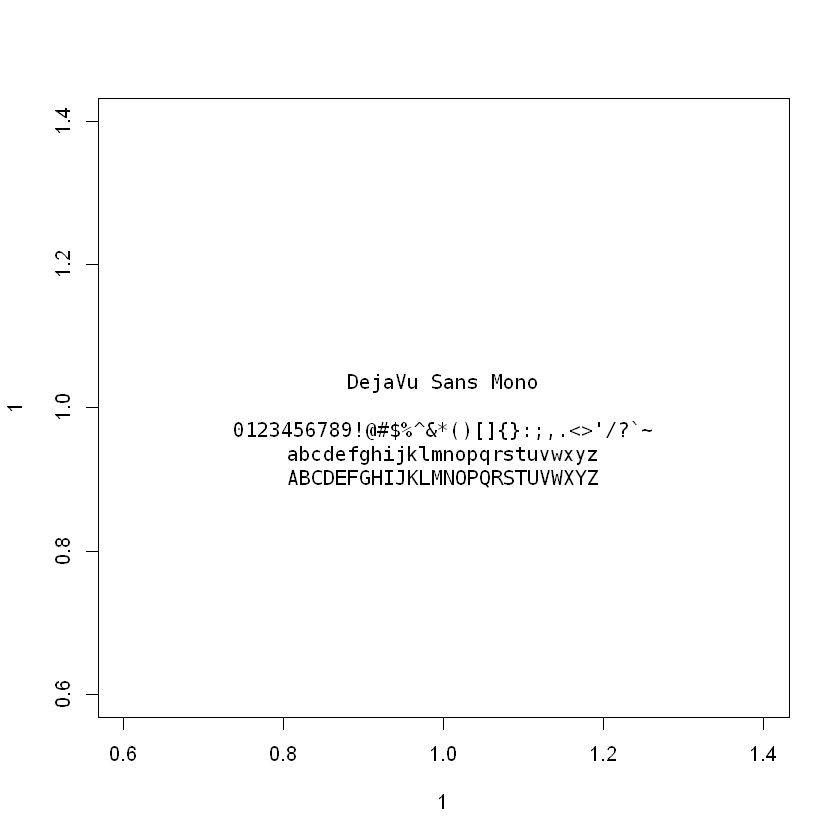

In [7]:
windowsFonts(
    M=windowsFont("DejaVu Sans Mono")
)
plot(1, 1, type="n")
# 字体示例
text(1, 1.05, paste("DejaVu Sans Mono\n", 
                    "0123456789!@#$%^&*()[]{}:;,.<>'/?`~",
                    "abcdefghijklmnopqrstuvwxyz",
                    "ABCDEFGHIJKLMNOPQRSTUVWXYZ", 
                    sep="\n"), pos=1, family="M")

如果你需要将图片输出到 pdf，这个参数也是可以使用的：

```r
pdf(file="filename.pdf", family="M")
```

### 图形尺寸与边距

参数 pin 用于指定图形尺寸（英寸），例如 `pin=c(4, 3)` 表示 4 英寸宽 3 英寸高。

用 mai()/mar() 依次指定下左上右四个方向的边距，单位分别是英寸与英分。默认是 `mar(c(5, 4, 4, 2)) + 0.1`

## 自定义其他元素

### 坐标轴

函数 side() 用于自定义坐标轴：

```r
axis(side, at=, labels=, pos=, lty=, col=, las=, tck=, ...)
```

- side: 指定在哪绘制坐标轴：1下2左3上4右
- at：刻度线位置
- labels：刻度线旁的标签，缺省时使用 at 中的值
- pos：坐标轴与另一坐标轴相交位置的值
- lty/col：线型/线与刻度的颜色
- las：标签平行于（=0）或垂直于（=2）坐标轴
- tck：刻度线。负值表示在图形外侧，0表示禁用刻度，1表示全长（即网格线）；默认 -0.01

### 网格线：abline() 与次要刻度

如果想使用次要刻度，请安装 Hmisc 包。次要刻度的长度将会是主刻度的 `tick.ratio` 倍。

网格线使用 abline() 命令，并分别用 h/v 指定网格线是竖直还是水平。

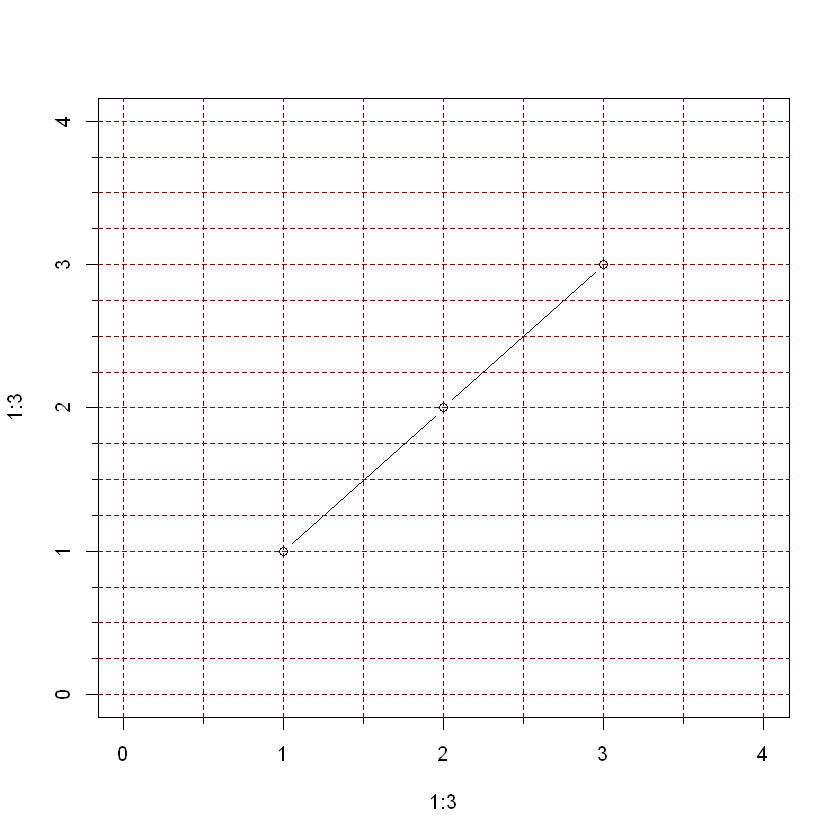

In [8]:
# 需要加载：library(Hmisc)
plot(1:3, 1:3, type="b", xlim=c(0, 4), ylim=c(0, 4))
minor.tick(nx=2, ny=4, tick.ratio=0.5)
abline(v=seq(0, 4, 0.5), h=seq(0, 4, 0.25), lty=2, col="darkred")

### 图例

命令 legend() 用于添加图例。

```r
legend(location, legend, [title=, ...])
```

参数含义：

- location：指定图例左上角的坐标，或者使用以下关键字：
    - 关键字：left/right, bottom/top, bottomleft/right, topleft/right, center
    - 如果使用了以上关键字，可以使用 inset= 参数指定向图形内移动的比例（分数形式）
- legend：标签组成的字符型向量。 
- title：图例标题的字符串
- 其他参数：
    - col/pch/lwd/lty：图例线条颜色/点样式/线宽/线型
    - bty/fill：盒型样式/颜色填充（用于条形图、箱形图或饼图）
    - bg：背景色
    - text.col：文本颜色
    - horiz：TRUE 会将图例水平放置

例子参见“直方图”一节的最后一例。

### 标注

#### 文字标注

主要有两个函数：text() 与 mtext()。前者向绘图区添加标注，后者向图形的边界添加标注。

```r
text(location, "string", pos, ...)
mtext("string", side, line=n, ...)
```

可以参考“标签和标题文本”一节的例子。其中：

- pos：使用1下2左3上4右的对应关系，比如“颜色”一节中就使用了 pos=1 的参数。
    - 如果指定了 pos，那么也可以指定 offset= 作为偏移量比值（相对单个字符宽）
- side：指定放置文本的图片边界，同样是1下2左3上4右。
    - 你可以使用 line= 来移动文本（正值向外，负值向内）；
    - 还可以通过 adj=0/1 指定文本向左下/右上对齐。

#### 数学标注

类似 LaTeX 的标注方式，不过实质上仍有一些区别：

| 代码 | 效果 | 代码 | 效果 | 代码 | 效果 |
| --- | --- | --- | --- | --- | --- |
| x%+-%y | $x\pm y$ | x%/%y | $x\div y$ | x%\*%y | $x\times y$ |
| x%.%y | $x\cdot y$ | x[i] | $x_i$ | x^2 | $x^2$ |
| x%prop%y | $x\propto y$ | sqrt(x, y) | $\sqrt[y]{x}$ | x!=y | $x\neq y$ |
| x%\~\~%y | $x\approx y$ | x%=\~%y | $x\cong y$ | x%==%y | $x\equiv y$ |

部分字体相关的命令：

- plain(x)：正体
- italic(x)：意大利字族（加斜）
- bold(x)：加粗
- bolditalic(x)：加斜加粗
- underline(x)：下划线

### 叠加绘图

叠加绘图最简单的方法，就是使用绘图的 `new=TRUE`：

```r
plot( ... )
plot( ... , new=TRUE)  # 记得用 axes=FALSE 将坐标轴、标签、标题隐藏掉
```

如果想要添加额外的点、线，使用 `points()` 命令与 `lines()` 命令。以及上面提到的参考线 `abline()` 命令：

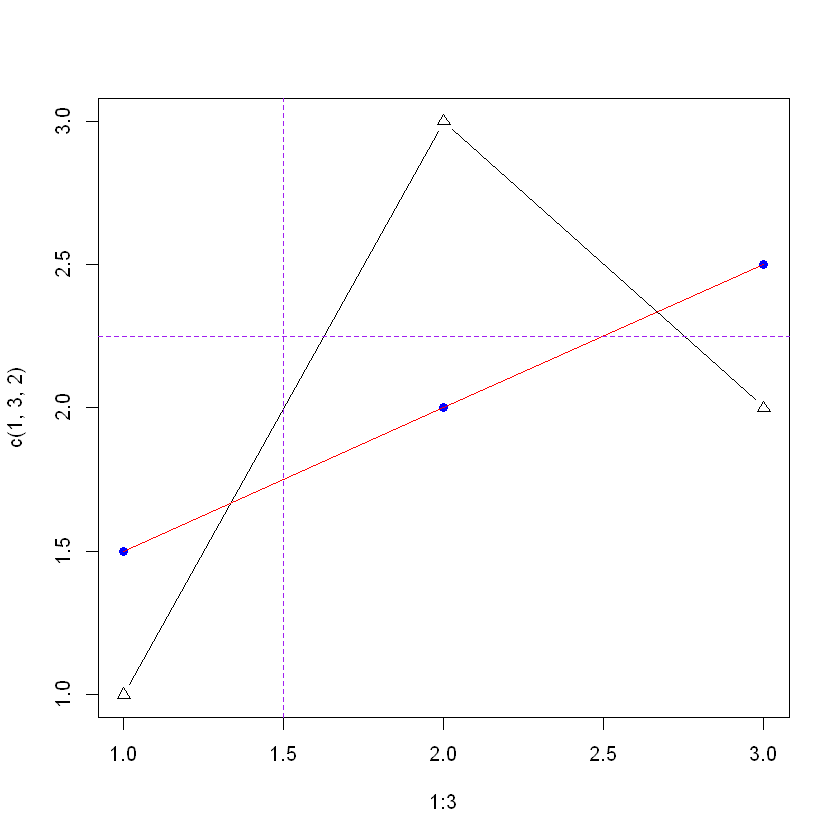

In [9]:
plot(1:3, c(1,3,2), type="b", pch=2)

points(1:3, seq(1.5, 2.5, 0.5), col="blue", pch=16)
lines(1:3, seq(1.5, 2.5, 0.5), col="red")
abline(v=1.5, h=2.25, lty=2,col="purple")

### 子图

#### 函数 layout()

函数 layout() 是一个强大的命令。例如：
    
```r
layout(matrix(c(1,1,2,3), 2, 2, byrow = TRUE))
```

就指定了图 1 占用第一行，图 2 和 3 共用第二行。也可以用 widths=/heights= 参数指定各列宽/各行高之间的比例：

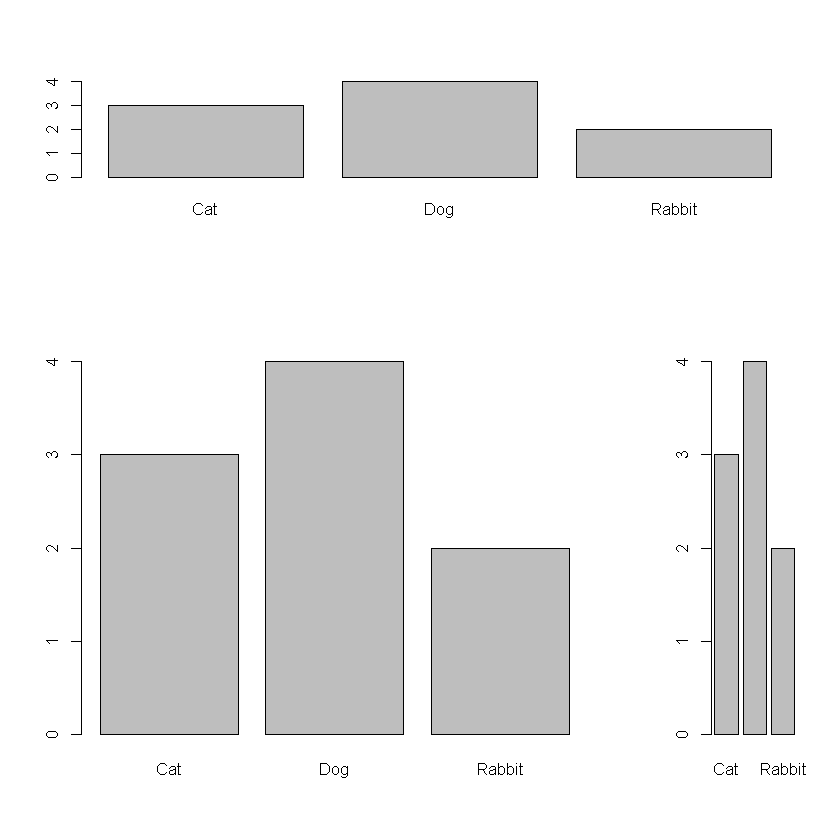

In [10]:
tmp <- c(rep("Cat", 3), rep("Dog", 4), rep("Rabbit", 2))
dt <- table(tmp)

layout(matrix(c(1, 1, 2, 3), 2, 2, byrow = TRUE),
       widths=c(3, 1), heights=c(1, 2))
barplot(dt)
barplot(dt)
barplot(dt)

#### 函数 par() 的 mfrow 参数

前文介绍过的 par() 中的 mfrow= 参数也是一个控制子图的方式。下例是两行两列的子图：
    
```r
opar <- par(no.readonly=TRUE)
par(mfrow=c(2,2))
plot(...)  # 图 1，左上
plot(...)  # 图 2，右上
plot(...)  # 图 3，左下
plot(...)  # 图 4，右下
par(opar)
```

#### 函数 par() 的 fig 参数

这种方式支持你以任何的位置、组合任意的图形。它比规整的 layout() 更加灵活。以下不使用 0.8 而使用 0.65 是为了看上去更紧凑。

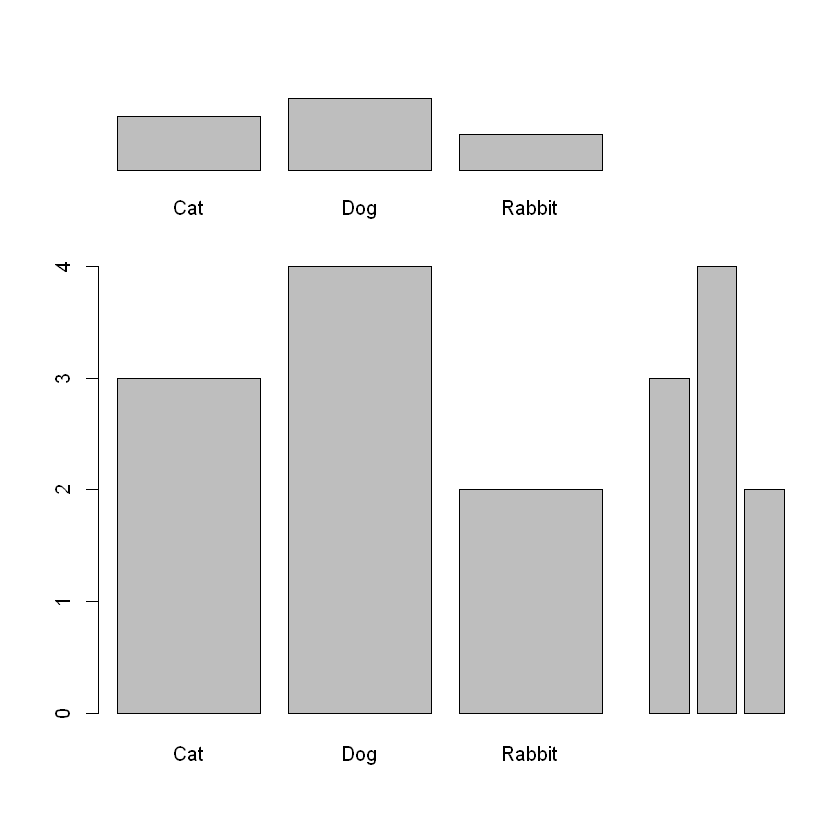

In [11]:
opar <- par(no.readonly=TRUE)

par(fig=c(0, 0.8, 0, 0.8))  # 主图：横向范围与纵向范围（左下为原点）
barplot(dt)


par(fig=c(0, 0.8, 0.65, 1), new=TRUE)  # 上方的图。注意 new 参数
barplot(dt, axes=F)

par(fig=c(0.65, 1, 0, 0.8), new=TRUE)  # 右侧的图
barplot(dt, axes=F, names.arg="")

## 统计图

### 条形图：barplot()

直接上例子。

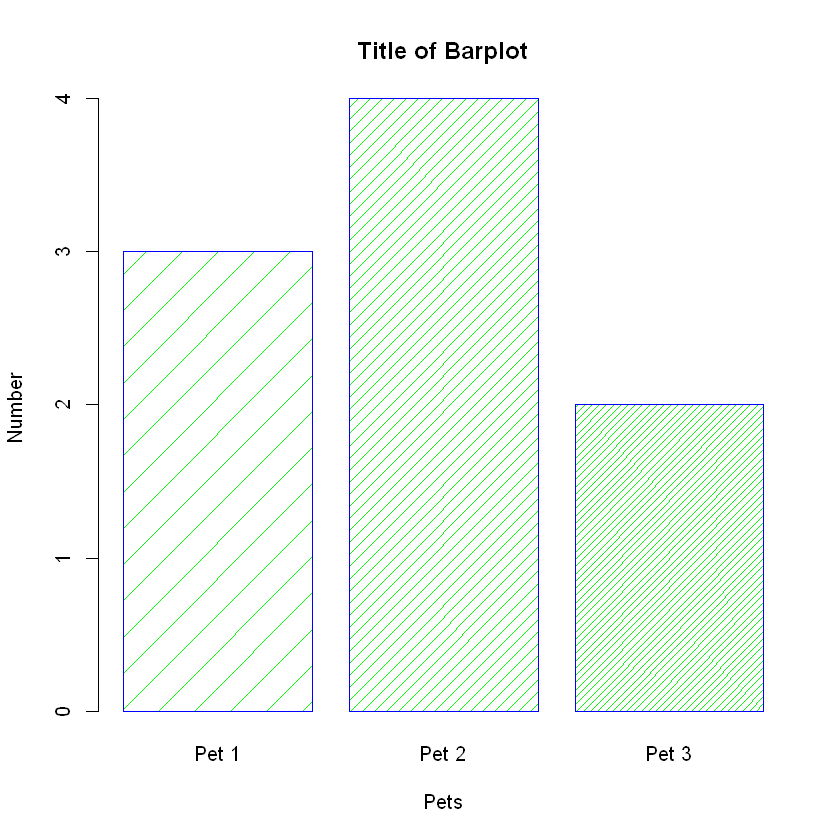

In [12]:
tmp <- c(rep("Cat", 3), rep("Dog", 4), rep("Rabbit", 2))
dt <- table(tmp)

barplot(dt, main="Title of Barplot", xlab="Pets", ylab="Number",
        col="green", border="blue", density=c(5, 15, 25),
        names.arg=paste("Pet", 1:3, sep=" "))

### 饼图：pie()

并不推荐的统计图类型，因此 R 中的功能也很有限。

```r
pie(x, labels=, ...)
```

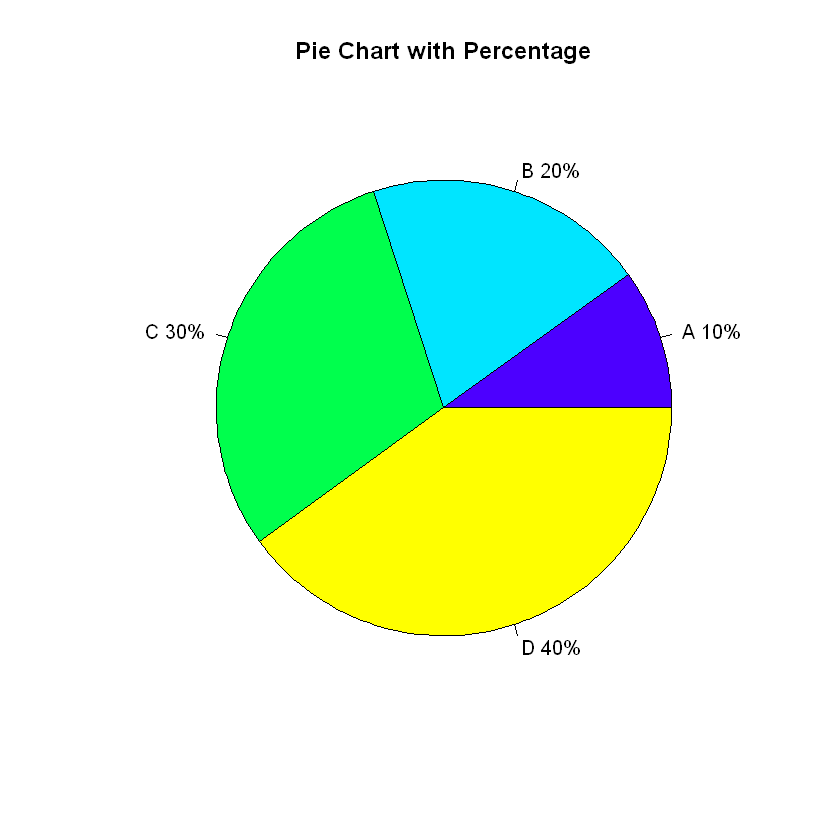

In [13]:
dt <- 1:4
lbl <- c("A", "B", "C", "D")
pie(dt, labels=paste(lbl, " ", round(dt/sum(dt)*100), "%", sep=""),
    col=topo.colors(length(lbl)), main="Pie Chart with Percentage")

### 直方图：hist() 及核密度曲线

直方图表示的是一维的数据（连续型）特征，纵轴是其在对应横轴区间内的频数或者频率。

```r
hist(x, freq=TRUE, breaks=, ...)
```

其中 freq 参数默认指定纵轴为频数而不是频率，break 用于指定横轴上分组的个数。

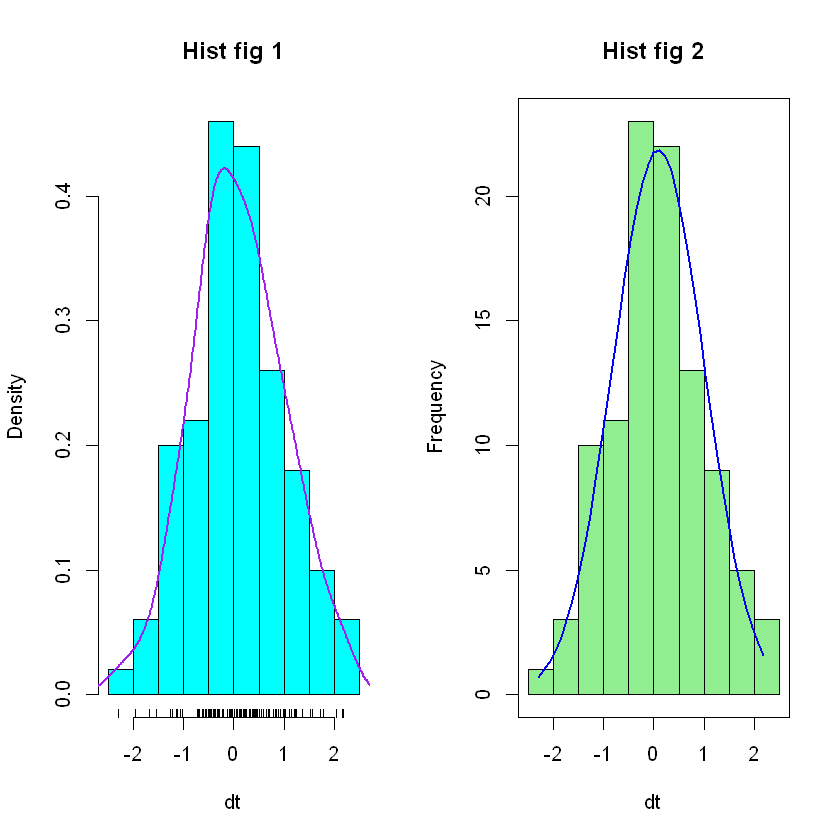

In [14]:
set.seed(123)
dt <- rnorm(100, mean=0, sd=1)
par(mfrow=c(1,2))

# 左图：频率直方图，以及轴须图
hist(dt, freq=F, breaks=10, col="cyan", main="Hist fig 1")
rug(jitter(dt))  # 如果有许多相同值，参数 amount=0.01 可将其随机化
lines(density(dt), col="purple", lwd=2)

# 右图：频数直方图，以及正态密度曲线
h.plot <- hist(dt, breaks=10, col="lightgreen", main="Hist fig 2")
xfit <- seq(min(dt), max(dt), length.out=40)
yfit <- dnorm(xfit, mean=mean(dt), sd=sd(dt))
yfit <- yfit*diff(h.plot$mids[1:2])*length(dt)
lines(xfit, yfit, col="blue", lwd=2)
box()

轴须图是一种一维的数据呈现，而上面的左图中的密度曲线是一种核密度估计。要比较核密度图，参考 sm 包的 sm.density.compare() 函数。如果只是要绘制，使用 density() 函数辅助即可：

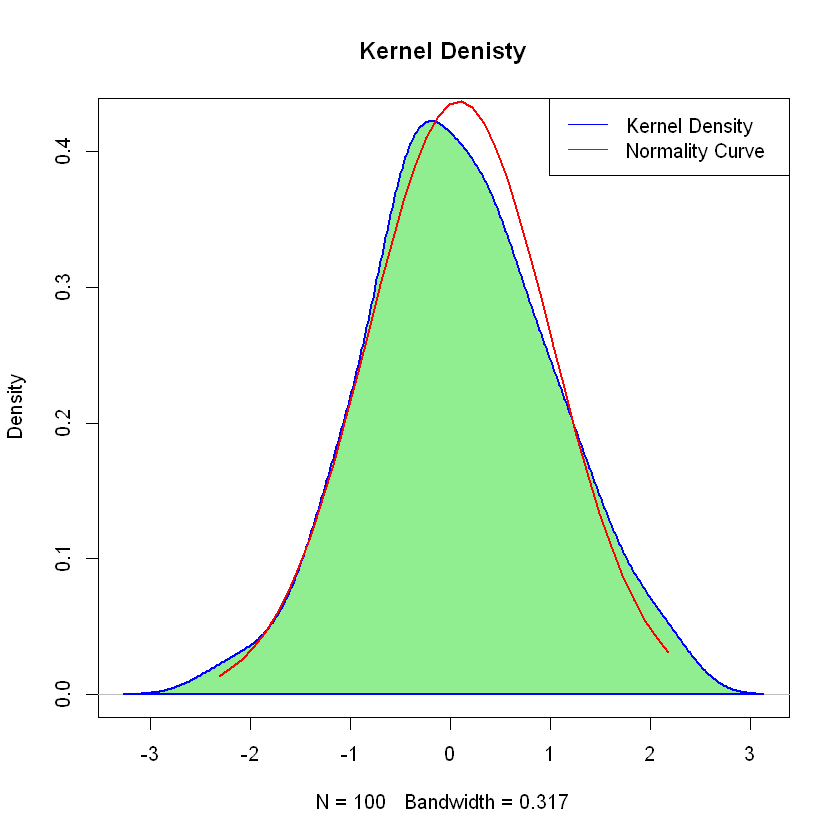

In [15]:
plot(density(dt), main="Kernel Denisty")
polygon(density(dt), col="lightgreen", border="blue", lwd=2)  # 绘制多边形的函数
# 叠加正态曲线
xfit <- seq(min(dt), max(dt), length.out=40)
yfit <- dnorm(xfit, mean=mean(dt), sd=sd(dt))
lines(xfit, yfit, col="red", lwd=2)
legend("topright", lty=c(1,1), col=c("blue", "red"),
       legend=c("Kernel Density", "Normality Curve"))

### 箱形图：boxplot() 及小提琴图

或者叫箱线图、盒须图。它描述了连续变量的五个特征参数：

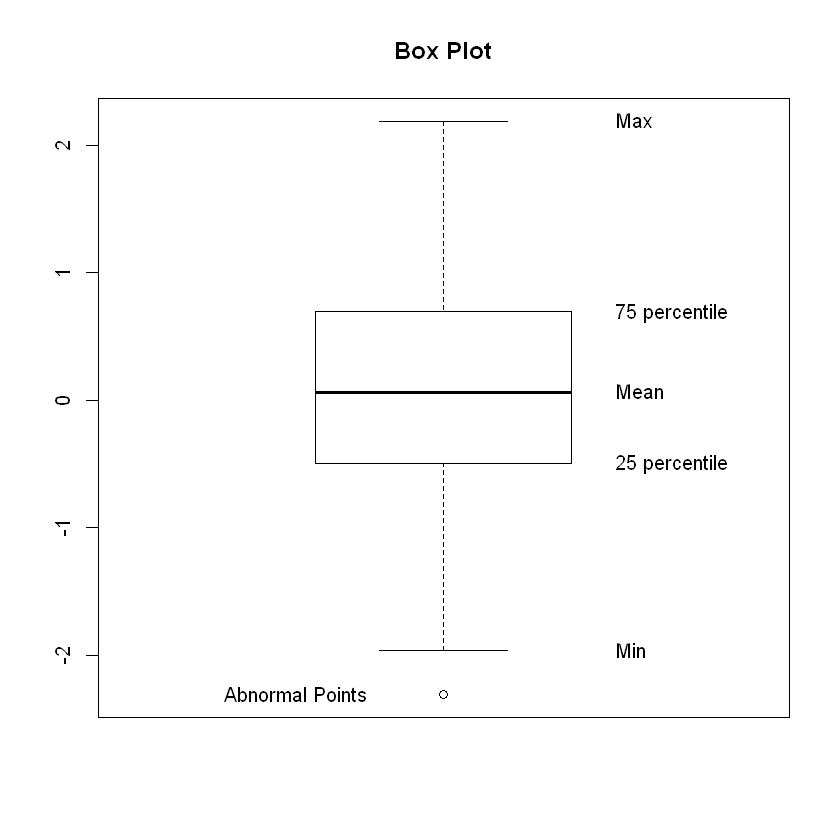

In [16]:
fig <- boxplot(dt, main="Box Plot")
paras <- c("Min", "25 percentile", "Mean", "75 percentile", "Max")
text(1.25, fig$stats, paras, pos=4)
text(0.9, fig$out, "Abnormal Points", pos=2)

如果是 dataframe 数据集中的类别型变量 A ，使用如下语句生成并列箱形图：

```r
boxplot(y~A, data=dataframe)
```

如果将公式改写成 `y~A*B`，那么会将类别型变量 A 和 B 的各水平两两组合，再生成箱形图。

其他参数：

- varwidth=F/T：为 TRUE 时，箱形图的宽度与样本数的算术平方根成正比。
- horizontal=F/T：为 TRUE 时，箱形图被横置。
- notch=F/T：为 TRUE 时，箱形图在绘制时会显示“凹槽”。

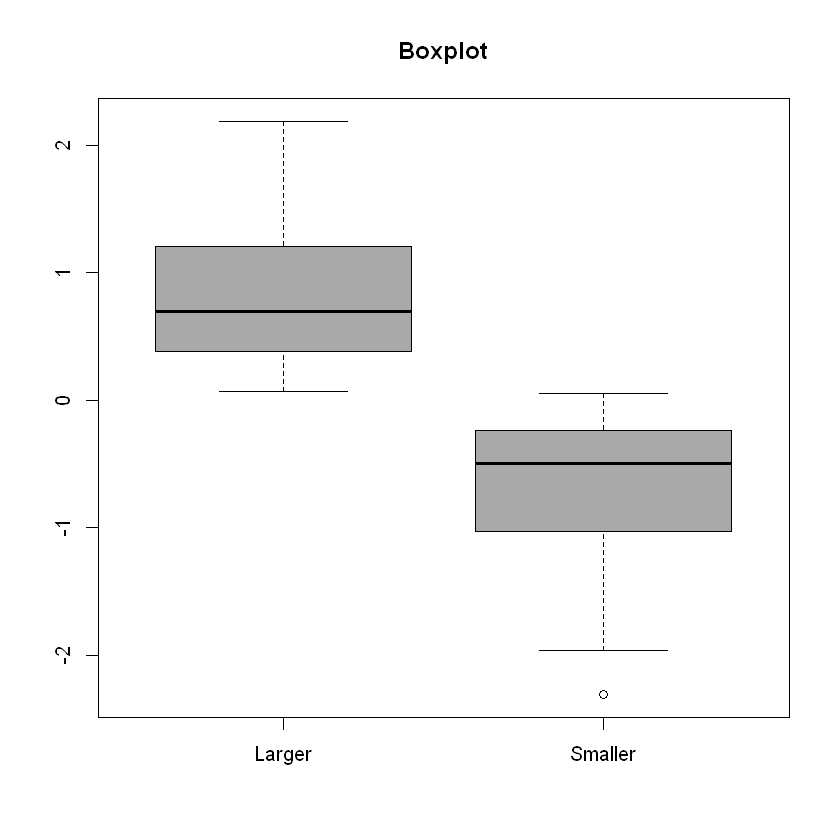

In [17]:
df <- data.frame(x=dt, type=NA)
df <- df[order(df$x),]
df$type <- c(rep("Smaller", 50), rep("Larger",50))
boxplot(x ~ type, data=df, col="darkgray", main="Boxplot")

最后再提一下箱形图与核密度图的一个结合体：小提琴图（violin plot）。这种图的绘制需要 vioplot 包。

在小提琴图中，核密度曲线被竖直放置，并对称地显示于数据轴的两侧：

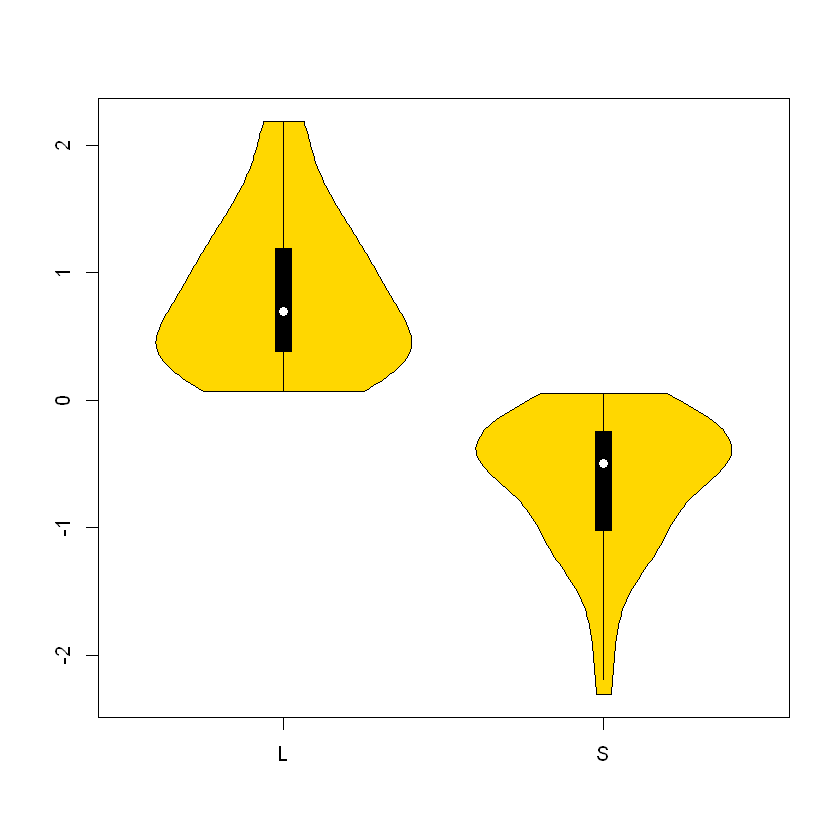

In [18]:
# 需要加载：library(vioplot)
vioplot(df$x[df$type == "Larger"], df$x[df$type == "Smaller"],
        names=c("L", "S"), col="gold")

### 点图

用于在水平刻度上绘制大量标签。本例选自参考书目同名章节。各参数：

- groups：选定一个因子，作为分组依据。
- gcolor：各组标签的颜色。

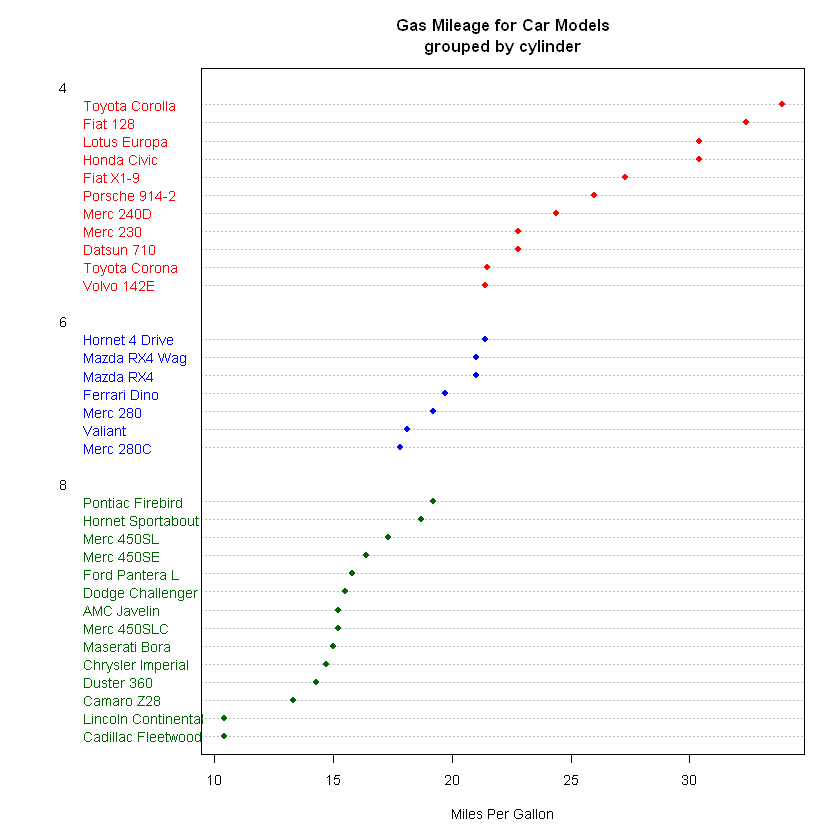

In [19]:
# mtcars 是 R 预装的数据集，其 cyl 变量有三个水平
x <- mtcars[order(mtcars$mpg),]
x$cyl <- factor(x$cyl)
x$color[x$cyl==4] <- "red"
x$color[x$cyl==6] <- "blue"
x$color[x$cyl==8] <- "darkgreen"
dotchart(x$mpg,
         labels = row.names(x),
         cex=.7,
         groups = x$cyl,
         gcolor = "black",
         color = x$color,
         pch=19,
         main = "Gas Mileage for Car Models\ngrouped by cylinder",
         xlab = "Miles Per Gallon")